In [112]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from IPython.display import display,HTML
import math

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

import warnings
warnings.filterwarnings('ignore')

In [2]:
def multiple_histogram(data, hue_feature, h=1600, w=1100):
    unique_hues = data[hue_feature].unique()  # Get unique categories in hue feature
    num_row = math.ceil(len(data.drop(hue_feature, axis = 1).columns) / 3)
    fig = make_subplots(rows=num_row, cols=3, subplot_titles=(data.drop(hue_feature, axis = 1).columns))

    place_col = 1
    place_row = 1
    for i in data.drop(hue_feature, axis = 1).columns:
        if i != hue_feature:  # Don't plot hue feature itself
            for hue in unique_hues:
                filtered_data = data[data[hue_feature] == hue]  # Filter by each hue category
                fig.add_trace(go.Histogram(x=filtered_data[i], name=f"{i} - {hue}",
                                           opacity=0.6),  # Add some transparency for overlay
                              row=place_row, col=place_col)

            place_col += 1
            if place_col == 4:
                place_col = 1
                place_row += 1

    fig.update_layout(height=h, width=w,
                      title_text="Multiple Histograms with Hue",
                      barmode="overlay")  # Overlay histograms
    return fig



def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

In [3]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [7]:
data.duplicated().sum()

0

In [8]:
for feature in data:
  print({feature: data[feature].nunique()})

{'Age': 43}
{'Attrition': 2}
{'BusinessTravel': 3}
{'DailyRate': 886}
{'Department': 3}
{'DistanceFromHome': 29}
{'Education': 5}
{'EducationField': 6}
{'EmployeeCount': 1}
{'EmployeeNumber': 1470}
{'EnvironmentSatisfaction': 4}
{'Gender': 2}
{'HourlyRate': 71}
{'JobInvolvement': 4}
{'JobLevel': 5}
{'JobRole': 9}
{'JobSatisfaction': 4}
{'MaritalStatus': 3}
{'MonthlyIncome': 1349}
{'MonthlyRate': 1427}
{'NumCompaniesWorked': 10}
{'Over18': 1}
{'OverTime': 2}
{'PercentSalaryHike': 15}
{'PerformanceRating': 2}
{'RelationshipSatisfaction': 4}
{'StandardHours': 1}
{'StockOptionLevel': 4}
{'TotalWorkingYears': 40}
{'TrainingTimesLastYear': 7}
{'WorkLifeBalance': 4}
{'YearsAtCompany': 37}
{'YearsInCurrentRole': 19}
{'YearsSinceLastPromotion': 16}
{'YearsWithCurrManager': 18}


In [9]:
df = data.copy()

In [10]:
df.drop(['EmployeeCount','StandardHours',
         'EmployeeNumber','Over18'],
        axis=1, inplace=True)

In [11]:
cat_data = df.select_dtypes(include='object')
num_data = df.select_dtypes(exclude='object')

In [12]:
num_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

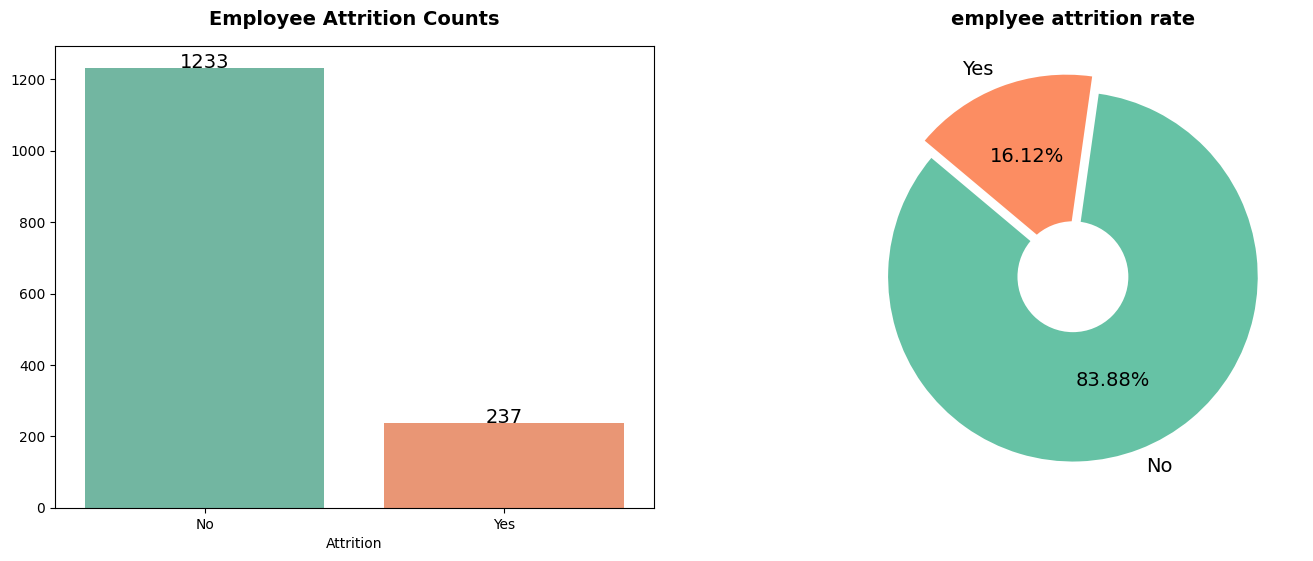

In [13]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
attrition_rate = cat_data['Attrition'].value_counts()
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='Set2')
plt.title('Employee Attrition Counts', fontweight='black', size=14, pad=15)

for i, v in enumerate(attrition_rate.values):
  plt.text(i,v,v, ha='center', fontsize=14)

plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=140)

center_circle= plt.Circle((0,0), 0.3, fc='white')
fig= plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('emplyee attrition rate', fontweight='black', size=14, pad=15)
plt.show()

In [14]:
cm = num_data.corr()

cols=cm.columns
fig= px.imshow(
    cm, x=cols, y=cols, color_continuous_scale='viridis', title='Correlation Heatmap'
)

fig.update_layout(
    width=900,
    height=800
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [15]:
multiple_histogram(pd.concat([num_data, cat_data['Attrition']], axis=1), hue_feature='Attrition' )

In [16]:
fig = px.scatter(
    df,
    x='YearsAtCompany',
    y='MonthlyIncome',
    title='Scatter Plot of MonthlyIncome vs. Job YearsAtCompany'
)

fig.update_layout(
    xaxis_title='YearsAtCompany',
    yaxis_title='MonthlyIncome',
    width=900,
    height=400
)

fig.show()

In [17]:
label_encoder = LabelEncoder()
cat_data['Gender']= label_encoder.fit_transform(cat_data['Gender'])
cat_data['Attrition'] = label_encoder.fit_transform(cat_data['Attrition'])
cat_data['OverTime'] = label_encoder.fit_transform(cat_data['OverTime'])

In [18]:
cat_data.dtypes

,0
Attrition,int64
BusinessTravel,object
Department,object
EducationField,object
Gender,int64
JobRole,object
MaritalStatus,object
OverTime,int64


In [19]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
for feature in cat_data.select_dtypes(include='object').columns:
 encoded_array = one_hot_encoder.fit_transform(cat_data[[feature]])

 encoded_df = pd.DataFrame(encoded_array, columns=one_hot_encoder.get_feature_names_out([feature]))
 encoded_df = encoded_df.astype(int)

 cat_data = pd.concat([cat_data.reset_index(drop=True), encoded_df], axis=1)

 cat_data.drop(columns=[feature], axis=1, inplace=True)

In [20]:
cat_data.head()

,Attrition,Gender,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [21]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [22]:
df = pd.concat([num_data, cat_data], axis=1)

In [23]:
df.shape

(1470, 50)

<Axes: xlabel='TotalWorkingYears'>

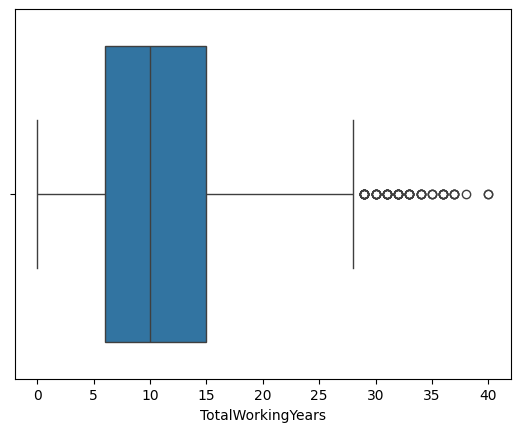

In [24]:
plt.figure()
sns.boxplot(data=df, x='TotalWorkingYears')

In [25]:
df = remove_outliers(df, 'TotalWorkingYears')

# models

## TSNE

In [26]:
x = df.drop('Attrition', axis=1)
y= df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y,
                                                    shuffle=True, random_state=42)

scaler = StandardScaler()
x_train = pd.DataFrame(data=scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(data=scaler.fit_transform(x_test), columns=x_test.columns)

In [27]:
tsne_projection = TSNE(n_components=2,
                       perplexity=2,
                       learning_rate=1,
                       init='pca',
                       method='barnes_hut',
                       n_jobs=-1,
                       n_iter=10**4,
                       random_state=42).fit_transform(x_train)
tsne_projection = pd.DataFrame(tsne_projection, columns=['feature1', 'feature2'],index=y_train.index.tolist())
tsne_projection['y_true'] = y_train.tolist()
tsne_projection.head()

px.scatter(tsne_projection, x='feature1', y='feature2', color="y_true", title='x_train & y_train')

In [28]:
x_train.shape

(1125, 49)

In [29]:
n= 40
pca = PCA(n_components=n)
principal_components = pca.fit_transform(x_train)

In [30]:
pca_columns = ['PC'+str(i) for i in range(1,n+1)]

x_train_PCA = pd.DataFrame(data=principal_components, columns=pca_columns)
x_train_PCA.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,1.427420,-0.861062,0.218000,-2.300300,0.370811,-1.973380,2.596294,-0.167729,1.616260,-1.853139,-1.004862,0.267092,-0.823646,1.725532,-0.864280,2.296021,-0.750310,-0.343358,-2.045877,1.177439,0.708772,0.070631,-0.972073,0.503813,0.059368,-0.155040,0.462388,0.294122,-1.671281,0.401157,0.372051,-1.315942,-1.337345,-1.635855,-1.219505,-0.892092,0.574112,-0.844107,-0.897566,-0.106559
1,0.973537,1.504782,-0.110042,0.440670,-1.416823,1.889161,-0.947260,-0.119228,-0.380307,0.897116,-0.380986,0.311991,1.049381,2.904732,-1.440318,-1.465024,2.916751,-1.096160,-0.365348,0.095171,0.130966,1.070789,0.290339,-0.908570,-0.346191,-1.383700,-1.011533,-0.591220,-0.399219,-1.294282,0.406589,-1.056148,-0.413305,0.662435,-0.262643,0.758451,0.213343,0.200336,-0.607435,-0.213319
2,-1.275427,-1.039145,5.536188,1.461118,2.176246,1.122714,0.748523,-1.530359,0.653560,0.404120,1.688743,-0.176478,0.469166,-0.201939,0.881085,-1.304637,0.389226,0.070938,0.652992,0.551285,0.273608,0.978946,-0.352922,-0.055036,-0.693900,0.448082,1.635039,-1.101236,0.783800,1.801261,0.254106,0.124818,2.046738,0.813974,-2.971978,0.682491,0.238709,-0.975958,0.182414,0.176954
3,1.394826,1.569898,0.279783,-2.622493,-0.875743,-2.710488,-0.943677,-2.133546,0.779157,-0.624801,-0.538554,-1.639132,1.243694,0.131454,3.895807,-1.064582,0.539607,1.109122,0.219347,-0.334520,-0.593817,-0.276229,0.646935,-0.701553,-2.201467,-0.819083,-1.604431,0.835616,1.541683,-0.819571,-0.030501,-0.564637,-0.058417,0.324377,0.077038,0.042724,0.110859,-0.204080,0.607037,-0.185872
4,-3.314004,0.724866,-0.517342,0.097002,1.950157,0.881769,-0.197393,1.396289,0.694981,-0.063940,-1.155793,-0.362058,-0.597934,0.529067,0.220826,1.190215,-0.907197,0.020637,0.689161,-0.495216,-0.150389,-0.771042,1.266102,0.480524,1.886073,-0.432003,1.180928,-0.132630,-0.068126,-0.641077,-0.249886,0.447860,0.351108,0.615376,0.296517,0.520316,0.088704,-0.221154,-0.176395,0.203667


In [31]:
principal_components = pca.transform(x_test)
x_test_pca = pd.DataFrame(data=principal_components, columns=pca_columns)
x_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-0.919952,-2.145937,11.128313,0.793006,2.103863,0.971094,0.669385,0.475261,-0.889914,-0.483115,0.218805,-0.167734,0.270551,0.073363,1.254934,-0.205720,-0.951433,-1.382609,0.705886,-0.163593,0.599947,-0.365948,0.757454,-0.466606,0.986395,-0.658008,-1.057823,-0.312376,-1.609351,-0.237330,0.464170,0.297871,-1.078970,-0.460175,4.299852,-0.947562,0.241400,0.643609,-0.263062,-0.259320
1,0.570851,-2.916992,-0.446158,1.583704,-1.133934,-1.747458,-1.085500,-0.659182,1.025830,-0.333010,-0.368734,-1.196717,-0.937997,-2.013212,-0.376299,0.572707,0.227976,0.360004,-0.194940,-0.526243,1.395508,3.007089,-0.249170,-2.619363,-2.198194,-0.681095,0.075951,-0.014177,-1.692208,0.170814,-0.596065,1.900136,-0.607735,-0.244310,-0.313686,-0.822829,0.080160,-0.110255,0.577397,-0.678226
2,1.793742,2.088264,0.041223,0.597065,-1.017291,0.344886,0.463774,1.463701,1.993040,-0.780404,2.837791,-0.301395,-0.459173,-0.670934,-0.613470,0.565352,-0.622004,-0.473808,0.207550,0.869602,-0.007505,-0.198741,-0.891773,-1.000828,-0.984072,-1.324918,0.220723,0.091081,-1.939316,-0.464891,-2.147747,0.532517,0.971169,-2.230688,-0.333812,-0.751897,-0.626657,-0.320044,1.249499,-0.138667
3,-1.920121,1.288907,-0.889564,1.960730,1.128140,-0.017792,2.698836,0.690948,1.315250,0.615605,-0.977215,-0.730806,0.367440,1.266946,0.538843,1.239577,0.815359,0.331993,-0.345223,0.495134,0.774806,-0.950046,0.043736,-0.764310,-0.144798,-0.620928,0.110004,0.091239,0.759337,0.115545,-0.712025,0.170220,-0.607093,-0.134593,-0.150277,0.228907,0.367053,0.767753,-0.514100,0.137617
4,-2.757102,1.213703,-0.304505,0.474854,-2.714575,0.697621,2.732498,-2.511091,-0.502266,0.236012,-0.863160,-0.794328,-0.625638,1.082016,0.522070,0.095449,0.494732,0.476393,-0.263416,0.478975,0.463933,0.098086,-1.204391,0.847601,1.745945,1.183385,1.315598,0.412080,2.066760,0.536096,-0.446285,0.068700,-1.524893,0.067008,-0.006219,0.674556,-0.174144,0.000020,-0.008737,-0.096435


In [32]:
tsne_projection = TSNE(n_components=2,
                       perplexity=2,
                       learning_rate=1,
                       init='pca',
                       method='barnes_hut',
                       n_jobs=-1,
                       n_iter=10**4,
                       random_state=42).fit_transform(x_train_PCA)

tsne_projection = pd.DataFrame(tsne_projection, columns=['feature1', 'feature2'],index=y_train.index.tolist())
tsne_projection['y_true'] = y_train.tolist()
tsne_projection.head()

px.scatter(tsne_projection, x='feature1', y='feature2', color="y_true", title='x_train_PCA & y_train')

## logistic Regression Base Model

In [33]:
LRBM = LogisticRegression(penalty='l1', solver='liblinear')
LRBM.fit(x_train_PCA, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [34]:
y_pred_train = LRBM.predict(x_train_PCA)

<Axes: >

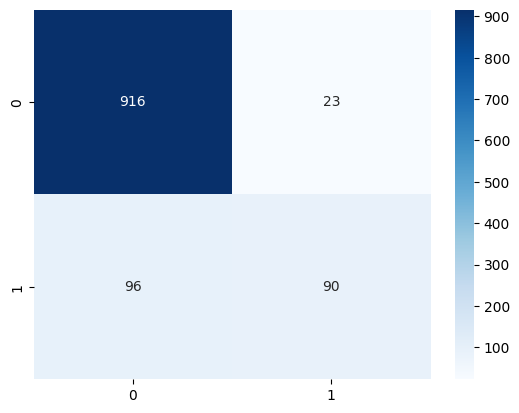

In [35]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [36]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
f1_score  = f1_score(y_train, y_pred_train)

print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'f1_score = {f1_score:.2f}')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       939
           1       0.80      0.48      0.60       186

    accuracy                           0.89      1125
   macro avg       0.85      0.73      0.77      1125
weighted avg       0.89      0.89      0.88      1125

accuracy = 0.89
racall = 0.48
precision = 0.80
f1_score = 0.60


<Axes: >

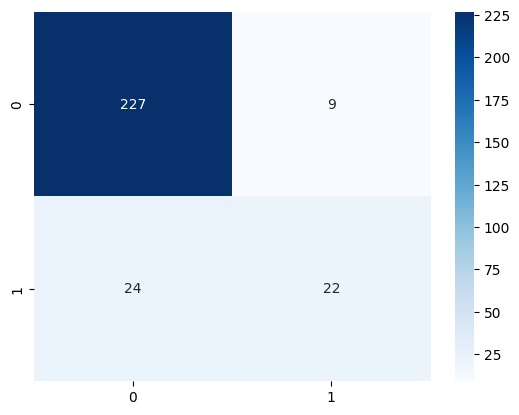

In [37]:
y_pred = LRBM.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [44]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)

print(f'accuracy = {accuracy:.2f}')
print(f'recall = {recall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1 Score = {f1_score_value:.2f}')

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       236
           1       0.71      0.48      0.57        46

    accuracy                           0.88       282
   macro avg       0.81      0.72      0.75       282
weighted avg       0.87      0.88      0.87       282

accuracy = 0.88
recall = 0.48
precision = 0.71
F1 Score = 0.57


In [45]:
data2 = data.copy()

In [46]:
cat_data = data.select_dtypes(include='object')
num_data = data.select_dtypes(exclude='object')

In [47]:
numerical_cols = [col for col in num_data.drop(['Education', 'StockOptionLevel'
                                               ,'PerformanceRating'
                                               ,'RelationshipSatisfaction'
                                               ,'WorkLifeBalance'
                                               ,'JobSatisfaction'
                                                ,'EnvironmentSatisfaction'], axis=1).columns if num_data[col].dtype != 'object']  # Filter numerical columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4

# Create a subplots grid using make_subplots
fig = make_subplots(rows=num_rows, cols=4) # Remove figsize argument

# Iterate over numerical columns and create boxplots
col_counter = 0
for row in range(num_rows):
    for col in range(4):
        if col_counter < num_cols:
            current_col = numerical_cols[col_counter]
            trace = go.Box(
                y=num_data[current_col],
                name=current_col,
                boxmean=True  # Optional: show box mean line
            )
            fig.add_trace(trace, row=row + 1, col=col + 1)  # Add trace to subplot
            fig.update_xaxes(title_text="Features", row=row + 1, col=col + 1)  # Set x-axis title
            fig.update_yaxes(title_text=current_col, row=row + 1, col=col + 1)  # Set y-axis title
            col_counter += 1
        else:
            # Hide unused subplots (optional)
            fig.update_xaxes(visible=False, row=row + 1, col=col + 1)
            fig.update_yaxes(visible=False, row=row + 1, col=col + 1)

# Adjust layout (optional)
fig.update_layout(title="Boxplots of Numerical Features", width=1100, height=500*num_rows) # Set the width and height of the figure using update_layout

fig.show()

In [48]:
data2 = pd.concat([num_data, cat_data], axis=1)

In [49]:
data2.shape

(1470, 35)

In [50]:
data2 = remove_outliers(data2, 'TotalWorkingYears')

In [51]:
data2.shape

(1407, 35)

In [52]:
# Label Encoding columns
label_encoder = LabelEncoder()
data2['Gender'] = label_encoder.fit_transform(data2['Gender'])
data2['Attrition'] = label_encoder.fit_transform(data2['Attrition'])
data2['OverTime'] = label_encoder.fit_transform(data2['OverTime'])

# Ordinal-encode the BusinessTravel column
oe = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])

# Fit the encoder to the data and transform the column
cat_data['BusinessTravel'] = oe.fit_transform(cat_data[['BusinessTravel']])


# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
for feature in data2.select_dtypes(include='object').columns:
    # Fit and transform the feature
    encoded_array = one_hot_encoder.fit_transform(data2[[feature]])

    # Create a DataFrame from the encoded array
    encoded_df = pd.DataFrame(encoded_array, columns=one_hot_encoder.get_feature_names_out([feature]))
    encoded_df = encoded_df.astype(int)

    # Concatenate the original DataFrame with the new encoded DataFrame
    data2 = pd.concat([data2.reset_index(drop=True), encoded_df], axis=1)

    # Drop the original categorical column
    data2.drop(columns=[feature], axis = 1, inplace=True)

In [53]:
data2.shape

(1407, 54)

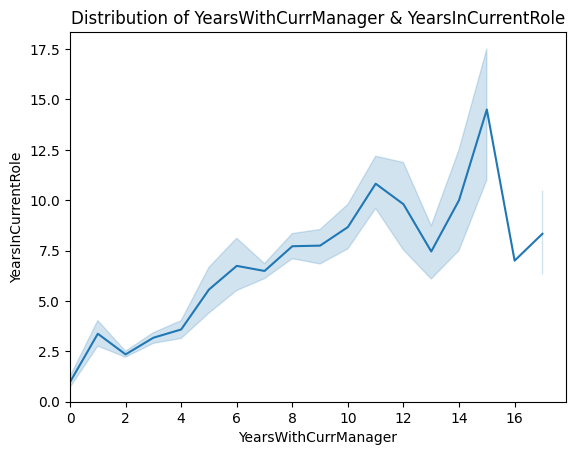

In [54]:
sns.lineplot(data2, x='YearsWithCurrManager', y='YearsInCurrentRole')
plt.title('Distribution of YearsWithCurrManager & YearsInCurrentRole')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [55]:
data2[['YearsWithCurrManager', 'YearsInCurrentRole']].head()

,YearsWithCurrManager,YearsInCurrentRole
0,5,4
1,7,7
2,0,0
3,0,7
4,2,2


In [56]:
(data2['YearsAtCompany']<12).sum()/len(data2) * 100

86.99360341151386

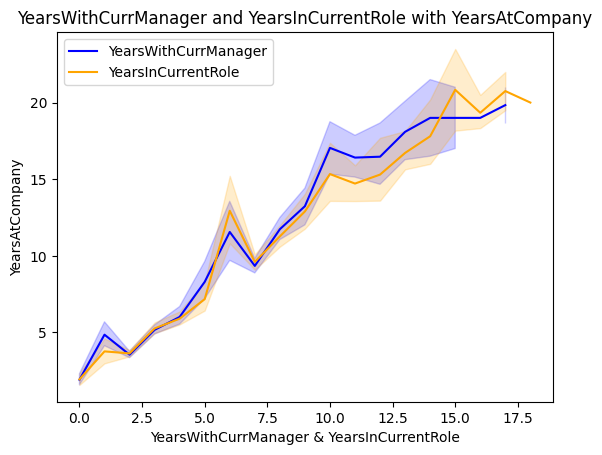

In [57]:
sns.lineplot(data2, x='YearsWithCurrManager', y='YearsAtCompany', color='blue', label='YearsWithCurrManager')
sns.lineplot(data2, x='YearsInCurrentRole', y='YearsAtCompany', color = 'orange', label='YearsInCurrentRole')
plt.title('YearsWithCurrManager and YearsInCurrentRole with YearsAtCompany')
plt.legend(handlelength=2, markerscale=2, loc= 'upper left')
plt.xlabel('YearsWithCurrManager & YearsInCurrentRole')
plt.ylabel('YearsAtCompany')
plt.show()

In [58]:
RatioMangComp = [ np.round(j/i, 2) if i != 0 else 0 for i, j in zip(data2['YearsAtCompany'], data2['YearsWithCurrManager'])]
data2['RatioMangComp'] = RatioMangComp

RatioRoleComp = [ np.round(j/i, 2) if i != 0 else 0 for i, j in zip(data2['YearsAtCompany'], data2['YearsInCurrentRole'])]
data2['RatioRoleComp'] = RatioRoleComp

In [59]:
data2[['HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'OverTime', 'Attrition']].head(5)

,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,OverTime,Attrition
0,94,1102,19479,5993,1,1
1,61,279,24907,5130,0,0
2,92,1373,2396,2090,1,1
3,56,1392,23159,2909,1,0
4,40,591,16632,3468,0,0


In [60]:
multiple_histogram(data=data2[['HourlyRate', 'DailyRate', 'MonthlyRate', 'Attrition']], hue_feature='Attrition', h=400, w=1100)

In [61]:
data2.drop(['HourlyRate', 'DailyRate', 'MonthlyRate'], axis=1, inplace=True)

In [62]:
hasPormotionLast5Years = [ 1 if i < 6 else 0  for i in data2['YearsSinceLastPromotion']]

In [63]:
data2['hasPormotionLast5Years'] = hasPormotionLast5Years

In [64]:
data2.drop(['YearsSinceLastPromotion'], axis=1, inplace=True)

In [65]:
data2.shape

(1407, 53)

In [66]:
x = data2.drop('Attrition', axis=1)
y = data2['Attrition']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

scaler = StandardScaler()
x_train = pd.DataFrame(data = scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(data = scaler.transform(x_test), columns=x_test.columns)

In [68]:
tsne_projection = TSNE(n_components=2,
                       perplexity=2,
                       learning_rate=1,
                       init='pca',
                       method='barnes_hut',
                       n_jobs=-1,
                       n_iter=10**4,
                       random_state=42).fit_transform(x_train)

In [69]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['feature1', 'feature2'],index=y_train.index.tolist())
tsne_projection['y_true'] = y_train.tolist()
tsne_projection.head()

,feature1,feature2,y_true
108,-9.267725,47.619469,0
512,-40.424389,8.145038,0
141,104.031792,10.201612,0
1093,10.527179,117.793289,0
1246,4.162132,-99.981277,0


In [70]:
px.scatter(tsne_projection, x='feature1', y='feature2', color="y_true", title='x_train & y_train')

In [75]:
n = 40
pca = PCA(n_components=n)
principal_components = pca.fit_transform(x_train)

In [76]:
PCA_columns = ['PC'+str(i) for i in range(1, n+1)]

# Convert the principal components to a DataFrame for visualization
x_train_PCA = pd.DataFrame(data=principal_components, columns=PCA_columns)

x_train_PCA.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-2.184301,0.837679,-0.320052,0.873435,-0.667154,0.919899,-0.256481,0.693245,2.141218,-0.975330,1.639236,-0.708110,-0.597458,-0.151679,-1.086272,0.115876,-0.595233,-0.087423,0.783224,-0.855771,1.200464,-0.685433,0.981743,-0.536779,-0.602870,-0.925764,0.942287,0.187469,-0.195528,0.619324,0.362332,-0.611003,-0.072246,-0.029538,0.021954,-0.111369,0.389225,0.163555,-0.139533,0.142720
1,2.165473,1.746533,-0.973902,-0.424744,2.334012,0.986251,0.019765,0.180604,-0.097032,-0.389437,0.638124,-1.986751,0.979217,-1.899180,0.193562,-0.539933,-0.216004,-0.919744,0.013136,0.891219,3.096157,-0.189620,-0.458176,0.608997,0.317452,0.383900,-1.744962,1.760222,-0.308249,-0.830115,-1.757489,0.611436,-2.914394,0.302519,0.210216,0.204908,-0.544668,-0.381075,-0.504808,-0.063233
2,4.234457,1.716162,0.424291,-0.838852,0.453278,-2.073489,-1.715157,0.003502,-0.080730,-1.590063,0.197515,-0.535312,-1.489950,0.798242,0.955290,1.594426,-0.781176,0.148189,0.798963,-2.212642,-1.098516,0.297087,-1.231468,-2.361313,0.890019,-1.385454,-0.407998,-1.272373,-0.860554,0.401937,-2.272569,1.336608,-1.086374,0.285672,-0.385592,-0.490059,-0.141498,0.016721,-0.487419,-0.425457
3,1.759533,1.629300,-0.414681,2.392578,-1.730505,1.586971,-0.370334,-0.837015,0.076254,1.382354,-0.091491,-0.555097,0.580680,0.787828,-0.233986,-0.955056,-0.036374,2.132081,0.017297,0.810427,-1.371415,1.802678,1.167519,0.598211,-0.930114,-0.550702,-1.216500,-1.490257,0.085564,0.116467,-1.828295,0.548347,-0.853065,0.535644,0.346956,1.713716,0.149224,-0.231426,-0.414511,-0.102158
4,0.953459,-3.799431,-0.352067,0.126699,-1.294581,-1.585466,-1.087246,-0.621714,0.939662,1.569706,-0.504935,-1.247867,0.194634,-0.980506,0.500304,0.876611,0.725053,1.315412,-0.324041,-0.096379,-0.678241,0.369803,0.660149,1.341588,1.181314,-1.360018,0.551897,-0.297272,2.310347,0.057964,-0.706268,-0.110125,-0.971796,-0.252849,-0.146591,0.869779,0.184065,0.488457,0.442222,-0.074761


In [77]:
principal_components = pca.transform(x_test)

In [78]:
x_test_PCA = pd.DataFrame(data=principal_components, columns=PCA_columns)

x_test_PCA.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-1.416671,1.016690,0.084383,-0.124442,-0.615649,1.193258,-0.423249,0.801425,1.511350,1.110091,2.037675,-0.209836,1.081248,-1.161217,0.868911,0.614708,-1.375695,0.790888,0.121861,-0.408449,0.393790,1.108210,0.843472,0.840277,0.737108,0.093475,0.580368,-1.170147,0.033676,0.816548,0.771386,0.214507,-0.406328,0.783467,0.403454,-0.968780,0.322130,-0.084587,-0.145642,0.190505
1,3.469685,1.672803,0.818424,-3.108895,-1.450773,0.672062,-0.948223,0.766542,1.406618,0.224764,0.035086,-1.244824,1.623130,-2.206591,-1.631374,-0.296951,0.960943,0.053570,0.859399,-1.326031,0.609204,-0.632193,0.185982,-1.609419,1.535009,0.884854,-0.720646,1.895347,-1.384275,-0.341542,0.156851,1.006535,-0.762600,0.322633,0.095993,0.136960,0.947550,0.501319,0.115772,-0.140908
2,-2.166282,1.130281,-0.176072,1.404588,-0.573520,-1.623179,-1.306495,-2.515653,-0.848985,-1.416203,-0.744114,-1.633642,-1.033932,-1.270444,1.326258,-0.344736,-0.600241,-0.962732,-1.360769,1.467216,-0.265925,-0.779073,0.300508,0.431967,1.422168,-1.463086,-0.153132,-0.657868,0.848188,0.115154,0.275506,0.202029,-0.479947,-0.203277,0.094620,0.035751,0.108520,0.054607,0.002766,0.001961
3,1.901135,-3.147682,-1.666411,1.026449,2.509053,-1.387837,-0.047622,-1.134072,-0.518824,0.945586,0.678623,-0.466966,-0.731641,-0.710472,1.622628,1.578489,0.000223,0.203084,0.393133,0.073617,-0.434819,0.544168,1.228093,0.820581,-0.067821,-0.972866,-0.949862,0.307660,0.211205,1.182277,-0.051026,0.084614,-2.616539,0.787593,0.226673,0.401962,-1.042466,0.030183,0.135389,-0.149726
4,1.272896,-3.171974,-1.690029,1.071279,1.815674,-2.389168,1.677850,-0.255515,-1.567060,0.622010,0.337667,2.521110,-0.548740,-0.232822,-1.716919,0.793144,-0.055090,0.789709,0.497889,-0.610435,0.354923,0.775760,0.652572,0.181354,-2.555508,-1.062839,-0.128124,1.216690,0.308578,0.721465,-0.096321,0.470919,-2.210620,0.288968,-0.163098,0.125326,0.618490,-0.440748,-0.318902,0.110023


In [79]:
tsne_projection = TSNE(n_components=2,
                       perplexity=2,
                       learning_rate=1,
                       init='pca',
                       method='barnes_hut',
                       n_jobs=-1,
                       n_iter=10**4,
                       random_state=42).fit_transform(x_train_PCA)

In [80]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['feature1', 'feature2'],index=y_train.index.tolist())
tsne_projection['y_true'] = y_train.tolist()
tsne_projection.head()

,feature1,feature2,y_true
108,-14.496614,55.447407,0
512,-32.514771,11.638516,0
141,122.273575,2.751760,0
1093,23.750761,121.249237,0
1246,3.488578,-99.331200,0


In [81]:
px.scatter(tsne_projection, x='feature1', y='feature2', color="y_true", title='x_train_PCA & y_train')

In [82]:
value_counts = y_train.value_counts()
fig = px.pie(value_counts, values=value_counts.values, names=value_counts.index, color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [83]:
#smote = SMOTE(sampling_strategy=1)
smote = SMOTE(random_state=42)
x_train_PCA, y_train = smote.fit_resample(x_train_PCA, y_train)

In [84]:
value_counts = y_train.value_counts()
fig = px.pie(value_counts, values=value_counts.values, names=value_counts.index, color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [85]:
tsne_projection = TSNE(n_components=2,
                       perplexity=2,
                       learning_rate=1,
                       init='pca',
                       method='barnes_hut',
                       n_jobs=-1,
                       n_iter=10**4,
                       random_state=42).fit_transform(x_train_PCA)

In [86]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['feature1', 'feature2'],index=y_train.index.tolist())
tsne_projection['y_true'] = y_train.tolist()
tsne_projection.head()

,feature1,feature2,y_true
0,-79.519798,43.185543,0
1,-5.154990,50.395145,0
2,112.370987,39.268181,0
3,19.560411,76.386703,0
4,43.443691,-116.138405,0


In [87]:
px.scatter(tsne_projection, x='feature1', y='feature2', color="y_true", title='x_train_PCA & y_train')

In [88]:
y_train.shape

(1644,)

In [89]:
y_train.shape

(1644,)

## LogisticRegression

In [90]:
LRC = LogisticRegression(penalty='l1', solver='liblinear')
LRC.fit(x_train_PCA, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

<Axes: >

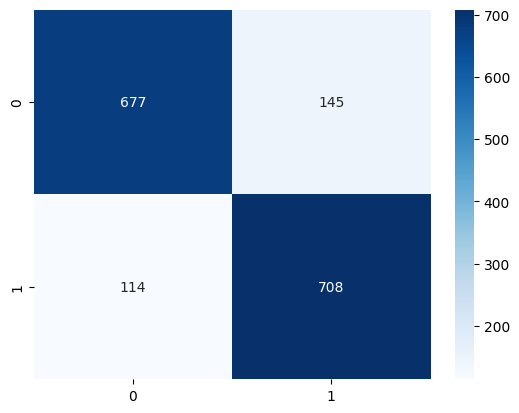

In [91]:
y_pred_train = LRC.predict(x_train_PCA)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [92]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       822
           1       0.83      0.86      0.85       822

    accuracy                           0.84      1644
   macro avg       0.84      0.84      0.84      1644
weighted avg       0.84      0.84      0.84      1644

accuracy = 0.84
racall = 0.86
precision = 0.83
F1_Score = 0.85


<Axes: >

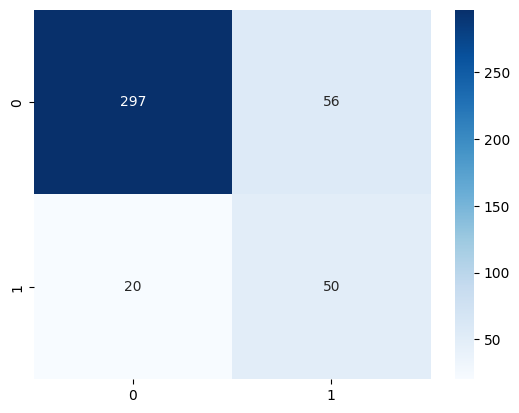

In [93]:
y_pred = LRC.predict(x_test_PCA)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [94]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       353
           1       0.47      0.71      0.57        70

    accuracy                           0.82       423
   macro avg       0.70      0.78      0.73       423
weighted avg       0.86      0.82      0.83       423

accuracy = 0.82
racall = 0.71
precision = 0.47
F1_Score = 0.57


## SVC

In [95]:
svc = SVC(C=1, gamma=0.003, kernel= 'rbf', random_state=42)
svc.fit(x_train_PCA, y_train)

SVC(C=1, gamma=0.003, random_state=42)

<Axes: >

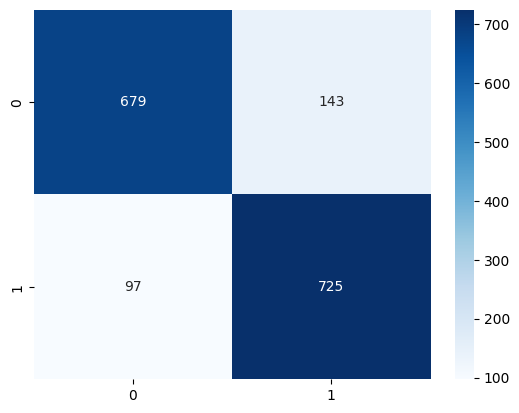

In [96]:
y_pred_train = svc.predict(x_train_PCA)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [97]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       822
           1       0.84      0.88      0.86       822

    accuracy                           0.85      1644
   macro avg       0.86      0.85      0.85      1644
weighted avg       0.86      0.85      0.85      1644

accuracy = 0.85
racall = 0.88
precision = 0.84
F1_Score = 0.86


<Axes: >

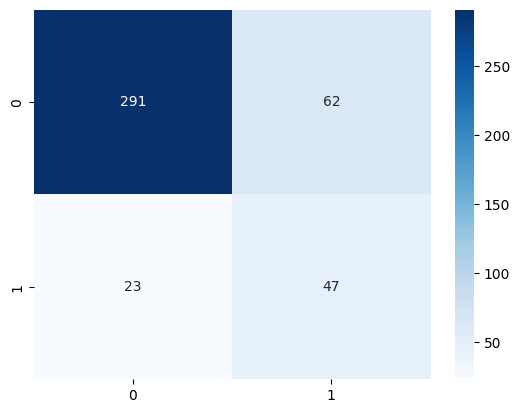

In [98]:
y_pred = svc.predict(x_test_PCA)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [99]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       353
           1       0.43      0.67      0.53        70

    accuracy                           0.80       423
   macro avg       0.68      0.75      0.70       423
weighted avg       0.84      0.80      0.82       423

accuracy = 0.80
racall = 0.67
precision = 0.43
F1_Score = 0.53


## KNN

In [100]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(x_train_PCA, y_train)

KNeighborsClassifier(n_neighbors=11)

<Axes: >

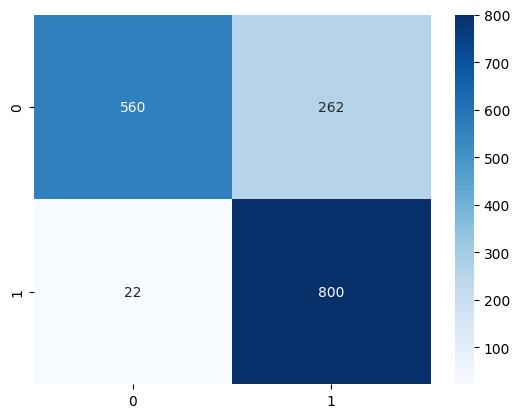

In [101]:
y_pred_train = knn.predict(x_train_PCA)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [102]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.96      0.68      0.80       822
           1       0.75      0.97      0.85       822

    accuracy                           0.83      1644
   macro avg       0.86      0.83      0.82      1644
weighted avg       0.86      0.83      0.82      1644

accuracy = 0.83
racall = 0.97
precision = 0.75
F1_Score = 0.85


<Axes: >

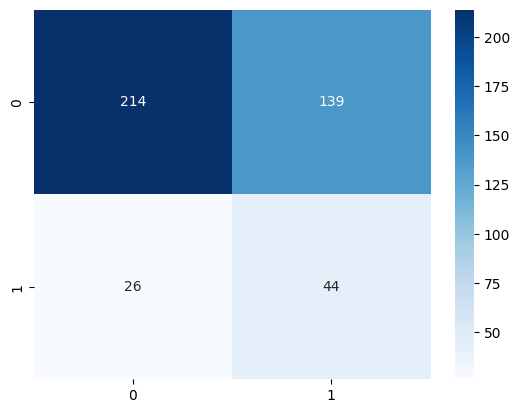

In [103]:
y_pred = knn.predict(x_test_PCA)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [104]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       353
           1       0.24      0.63      0.35        70

    accuracy                           0.61       423
   macro avg       0.57      0.62      0.53       423
weighted avg       0.78      0.61      0.66       423

accuracy = 0.61
racall = 0.63
precision = 0.24
F1_Score = 0.35


## GaussianNB

In [105]:
GNB = GaussianNB()

GNB.fit(x_train_PCA, y_train)

GaussianNB()

<Axes: >

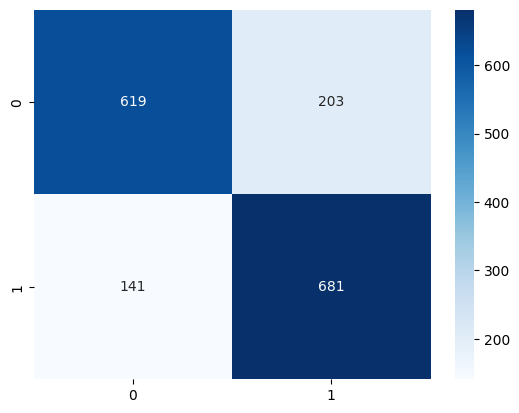

In [106]:
y_pred_train = GNB.predict(x_train_PCA)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [107]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       822
           1       0.77      0.83      0.80       822

    accuracy                           0.79      1644
   macro avg       0.79      0.79      0.79      1644
weighted avg       0.79      0.79      0.79      1644

accuracy = 0.79
racall = 0.83
precision = 0.77
F1_Score = 0.80


<Axes: >

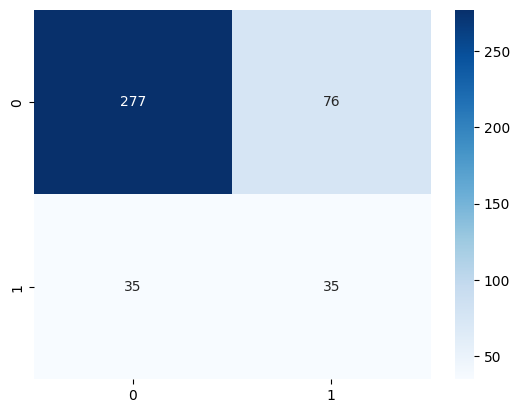

In [108]:
y_pred = GNB.predict(x_test_PCA)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [109]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       353
           1       0.32      0.50      0.39        70

    accuracy                           0.74       423
   macro avg       0.60      0.64      0.61       423
weighted avg       0.79      0.74      0.76       423

accuracy = 0.74
racall = 0.50
precision = 0.32
F1_Score = 0.39


## DecisionTreeClassifier



In [113]:
DTC = DecisionTreeClassifier(max_depth=5, random_state=42)

DTC.fit(x_train_PCA, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

<Axes: >

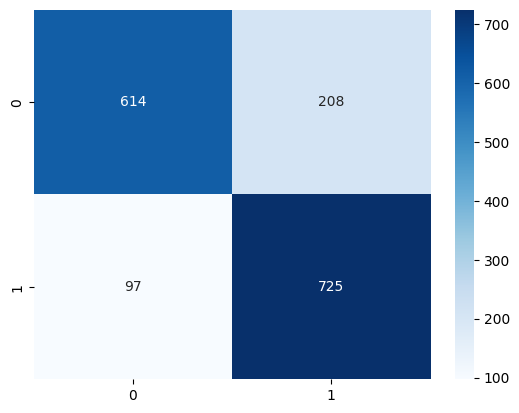

In [114]:
y_pred_train = DTC.predict(x_train_PCA)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [115]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       822
           1       0.78      0.88      0.83       822

    accuracy                           0.81      1644
   macro avg       0.82      0.81      0.81      1644
weighted avg       0.82      0.81      0.81      1644

accuracy = 0.81
racall = 0.88
precision = 0.78
F1_Score = 0.83


<Axes: >

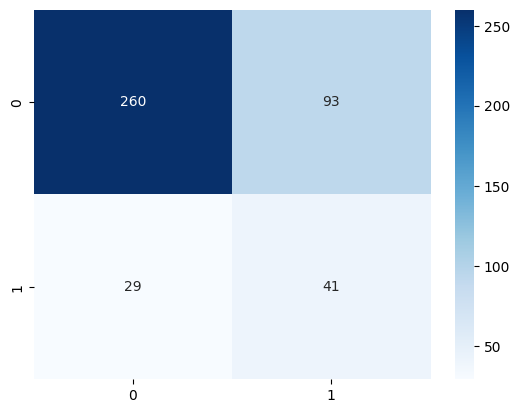

In [116]:
y_pred = DTC.predict(x_test_PCA)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')


In [117]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       353
           1       0.31      0.59      0.40        70

    accuracy                           0.71       423
   macro avg       0.60      0.66      0.61       423
weighted avg       0.80      0.71      0.74       423

accuracy = 0.71
racall = 0.59
precision = 0.31
F1_Score = 0.40


In [118]:
RF = RandomForestClassifier(n_estimators=1500, max_depth=5, max_features='sqrt', random_state=42)

RF.fit(x_train_PCA, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1500, random_state=42)

<Axes: >

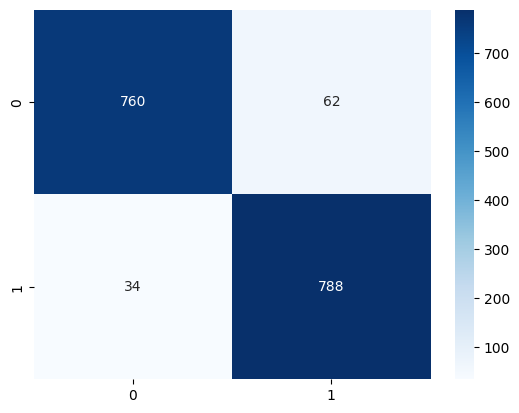

In [119]:
y_pred_train = RF.predict(x_train_PCA)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [120]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       822
           1       0.93      0.96      0.94       822

    accuracy                           0.94      1644
   macro avg       0.94      0.94      0.94      1644
weighted avg       0.94      0.94      0.94      1644

accuracy = 0.94
racall = 0.96
precision = 0.93
F1_Score = 0.94


<Axes: >

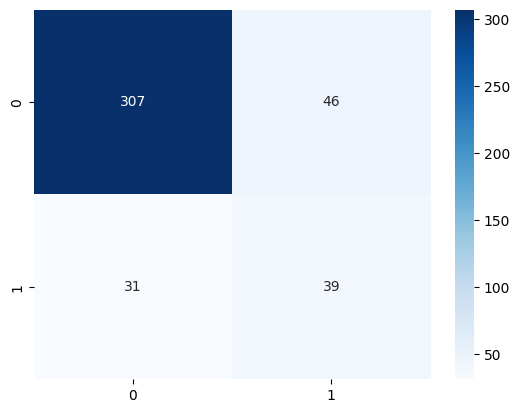

In [121]:
y_pred = RF.predict(x_test_PCA)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [122]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       353
           1       0.46      0.56      0.50        70

    accuracy                           0.82       423
   macro avg       0.68      0.71      0.70       423
weighted avg       0.83      0.82      0.82       423

accuracy = 0.82
racall = 0.56
precision = 0.46
F1_Score = 0.50


## AdaBoostClassifier

In [123]:
ABC = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.8, algorithm='SAMME', random_state=42)

ABC.fit(x_train_PCA, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.8, n_estimators=200, random_state=42)

<Axes: >

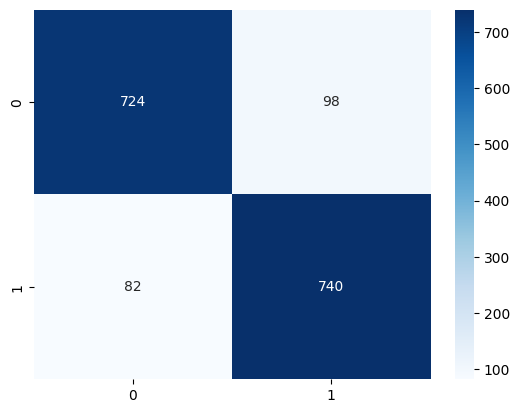

In [124]:
y_pred_train = ABC.predict(x_train_PCA)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [125]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       822
           1       0.88      0.90      0.89       822

    accuracy                           0.89      1644
   macro avg       0.89      0.89      0.89      1644
weighted avg       0.89      0.89      0.89      1644

accuracy = 0.89
racall = 0.90
precision = 0.88
F1_Score = 0.89


<Axes: >

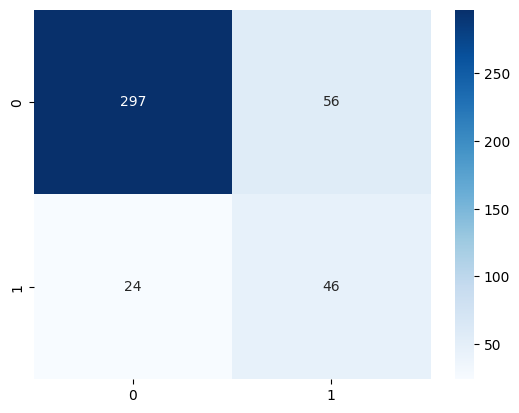

In [126]:
y_pred = ABC.predict(x_test_PCA)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [127]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       353
           1       0.45      0.66      0.53        70

    accuracy                           0.81       423
   macro avg       0.69      0.75      0.71       423
weighted avg       0.85      0.81      0.82       423

accuracy = 0.81
racall = 0.66
precision = 0.45
F1_Score = 0.53


## GradientBoostingClassifier

In [128]:
GBC = GradientBoostingClassifier(
    learning_rate=0.005,
    n_estimators=350,
    max_depth=3,
    random_state=42,
    max_features='sqrt'
)

GBC.fit(x_train_PCA, y_train)

GradientBoostingClassifier(learning_rate=0.005, max_features='sqrt',
                           n_estimators=350, random_state=42)

<Axes: >

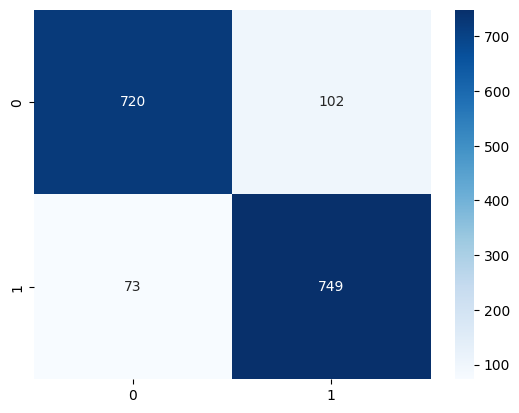

In [129]:
y_pred_train = GBC.predict(x_train_PCA)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [130]:
print(classification_report(y_train, y_pred_train))

accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       822
           1       0.88      0.91      0.90       822

    accuracy                           0.89      1644
   macro avg       0.89      0.89      0.89      1644
weighted avg       0.89      0.89      0.89      1644

accuracy = 0.89
racall = 0.91
precision = 0.88
F1_Score = 0.90


<Axes: >

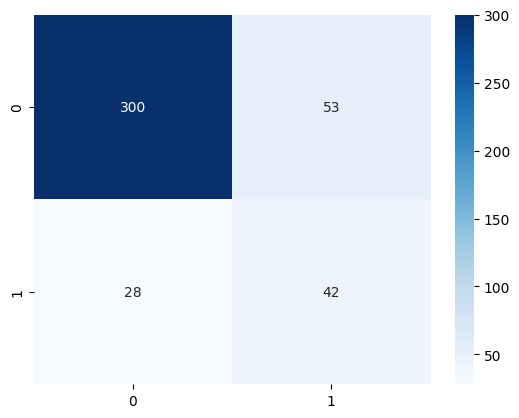

In [131]:
y_pred = GBC.predict(x_test_PCA)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [132]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       353
           1       0.44      0.60      0.51        70

    accuracy                           0.81       423
   macro avg       0.68      0.72      0.70       423
weighted avg       0.84      0.81      0.82       423

accuracy = 0.81
racall = 0.60
precision = 0.44
F1_Score = 0.51


## XGBoost

In [133]:
XGB = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.01,
    n_estimators=350,
    max_depth=3,
    random_state=42,
    max_features='sqrt',
)

XGB.fit(x_train_PCA, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_features='sqrt',
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=350,
              n_jobs=None, num_parallel_tree=None, ...)

<Axes: >

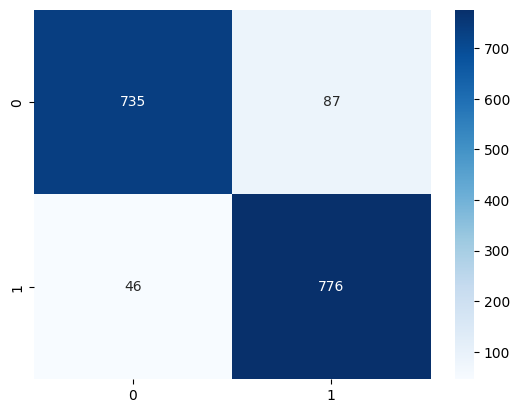

In [134]:
y_pred_train = XGB.predict(x_train_PCA)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [135]:
print(classification_report(y_train, y_pred_train))
accuracy = accuracy_score(y_train, y_pred_train)
racall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
F1_Score = f1_score(y_train, y_pred_train)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       822
           1       0.90      0.94      0.92       822

    accuracy                           0.92      1644
   macro avg       0.92      0.92      0.92      1644
weighted avg       0.92      0.92      0.92      1644

accuracy = 0.92
racall = 0.94
precision = 0.90
F1_Score = 0.92


<Axes: >

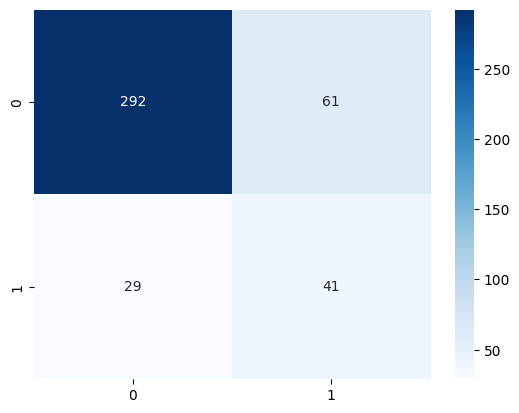

In [136]:
y_pred = XGB.predict(x_test_PCA)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.0f')

In [137]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
racall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(f'accuracy = {accuracy:.2f}')
print(f'racall = {racall:.2f}')
print(f'precision = {precision:.2f}')
print(f'F1_Score = {F1_Score:.2f}')

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       353
           1       0.40      0.59      0.48        70

    accuracy                           0.79       423
   macro avg       0.66      0.71      0.67       423
weighted avg       0.83      0.79      0.80       423

accuracy = 0.79
racall = 0.59
precision = 0.40
F1_Score = 0.48
